## CW 1

### Read in the data

In [1]:
library(tidyverse)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
getwd()

[1] "/media/shaunak/New Volume/my_projects/data science updated/COMP 6235 Foundations of Data Science/CW 1"

In [5]:
fish_data <- read.table(file = "./data/fish1", header = FALSE, 
                        sep = " ", dec = ".", col.names = c("X", "Y", "Z"))

head(fish_data)

X,Y,Z
15.25,2.40,B
7.43,1.66,C
7.17,2.75,C
2.93,1.21,A
11.07,0.39,C
4.29,1.84,A


In [6]:
summary(fish_data)

       X                Y          Z      
 Min.   : 0.010   Min.   :0.0100   A: 79  
 1st Qu.: 4.325   1st Qu.:0.7075   B: 64  
 Median : 9.020   Median :1.6150   C:257  
 Mean   : 9.371   Mean   :1.6674          
 3rd Qu.:13.748   3rd Qu.:2.4000          
 Max.   :22.270   Max.   :4.8800          

Min value of X: 0.010 which indicates that the catch was made near midnight

Max value of X: 22.270 which indicates that the catch was made near 10:15 pm

Also there are **no missing values** in our dataset

- **What does summary() tell us about the dist of data?**

### Information on dataset

The data set records data for a time period of one day during which one fisherman has fished in a lake. 

The fisherman uses three types of fishing rods, labeled A, B, and C, each using different bait. 

The fisherman has recorded every catch he has made during this time. The data set consists of three columns with X
values giving the times at which the fisherman has made a catch, the Y values indicate the size of that catch (i.e. its weight in kg), and the Z values give a letter A, B, or C which indicates which fishing rod was used to make that catch. 

#### Format of X:

X values (times of catch, the format is hours, fraction of hours on a 24h schedule for the day)

### Distribution of X

- **use Freedman-Diaconis rule for bin size**

- mean

- median 

- mode

- geometric mean

- std devs

- skewness

**Visualize all these as in [slide](http://edshare.soton.ac.uk/19465/1/COMP6235_2.pdf)

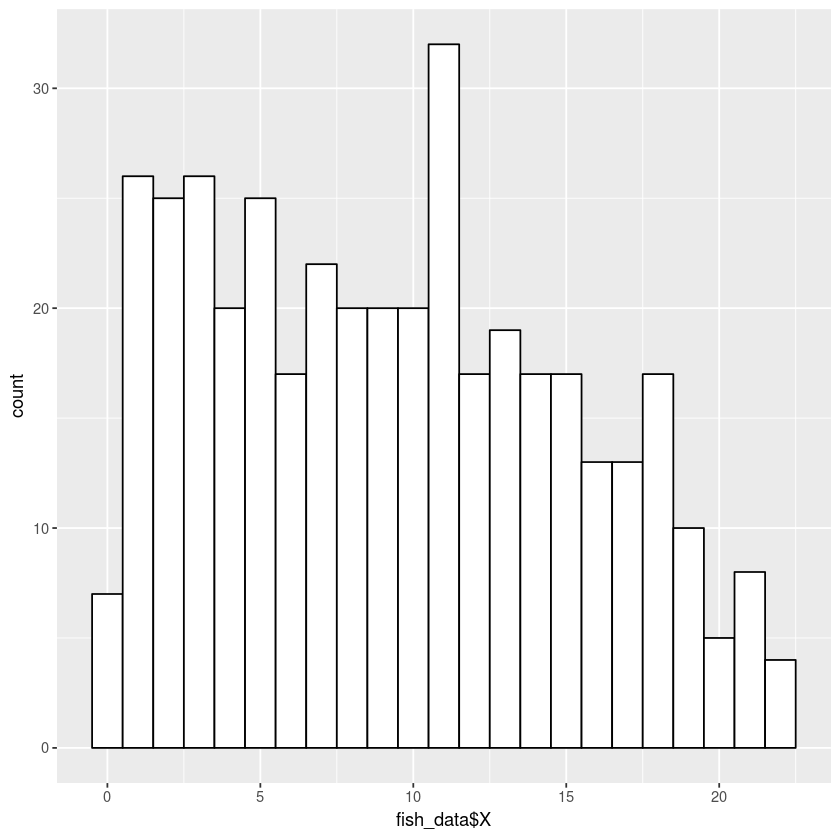

In [58]:
# normal histogram

ggplot(data = fish_data, mapping = aes(x = fish_data$X)) +
    geom_histogram(binwidth = 1, color = "black", fill = "white") 

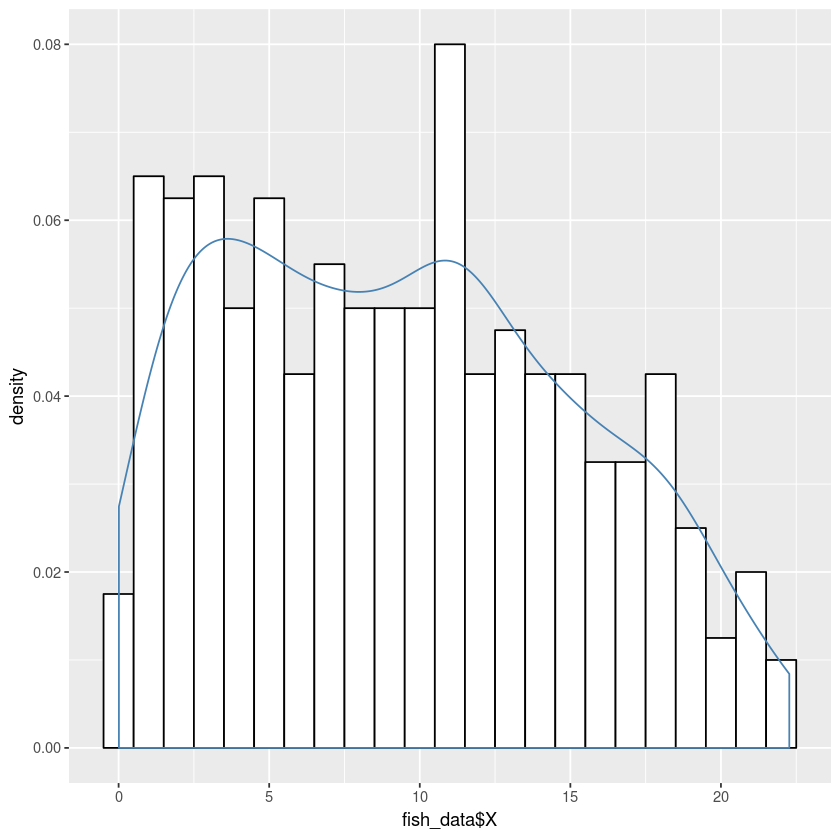

In [29]:
# Histogram overlaid with kernel density curve


ggplot(data = fish_data, mapping = aes(x = fish_data$X)) +
    geom_histogram(aes(y=..density..), binwidth = 1, color = "black", fill = "white") +
    geom_density(color = "steelblue")

### Summary Statistics of X


In [36]:
summary(fish_data$X)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.010   4.325   9.020   9.371  13.748  22.270 

From summary stats we can see that mean and median are quite close, and our data is more or less symmetric without many outliers

The data will be slightly skewed to the right (positive skew) as mean > median . Also we can see this from the density curve 

In [54]:
X_IQR <- summary(fish_data$X)['3rd Qu.'] - summary(fish_data$X)['1st Qu.']

X_IQR

3rd Qu. 
 9.4225 

In [55]:
X_sd <- sd(fish_data$X)

In [57]:
X_skew <- (mean(fish_data$X) - median(fish_data$X))/X_sd
print(X_skew)

[1] 0.06047288


### Distribution of Y

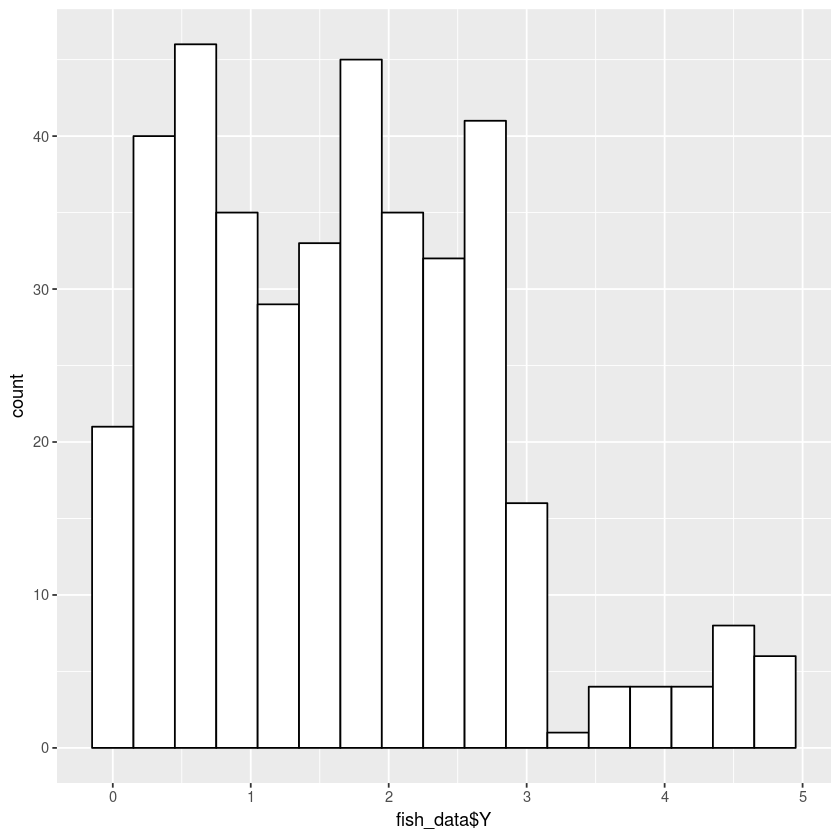

In [62]:
# normal histogram

ggplot(data = fish_data, mapping = aes(x = fish_data$Y)) +
    geom_histogram(binwidth = 0.3, color = "black", fill = "white") 

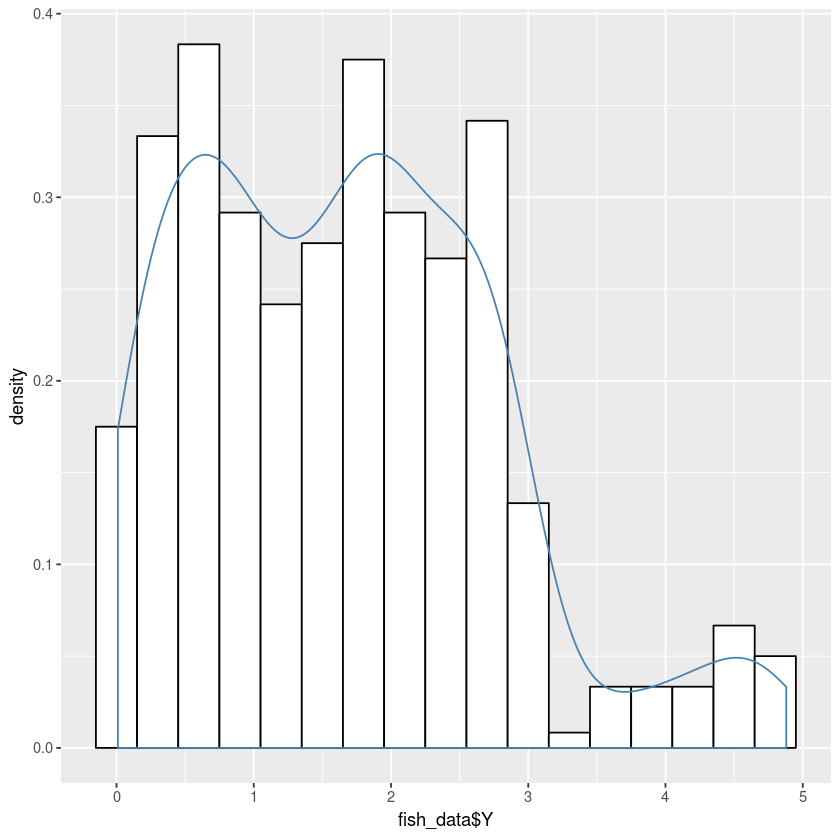

In [64]:
# Histogram overlaid with kernel density curve


ggplot(data = fish_data, mapping = aes(x = fish_data$Y)) +
    geom_histogram(aes(y=..density..), binwidth = 0.3, color = "black", fill = "white") +
    geom_density(color = "steelblue")

### Summary Statistics of Y



In [65]:
summary(fish_data$Y)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0100  0.7075  1.6150  1.6674  2.4000  4.8800 

From summary stats we can see that mean is greater than the median , so our data has a positive skew (skewed to the right). Also there might be a few outliers as is seen from the distribution plots. There are a few outliers taht pull the mean away from the median.


In [66]:
Y_IQR <- summary(fish_data$Y)['3rd Qu.'] - summary(fish_data$Y)['1st Qu.']

Y_IQR

3rd Qu. 
 1.6925 

In [67]:
Y_sd <- sd(fish_data$Y)

In [68]:
Y_skew <- (mean(fish_data$Y) - median(fish_data$Y))/Y_sd
print(Y_skew)

[1] 0.04728561


### Analysing effectiveness of each type of bait

In [69]:
head(fish_data)

X,Y,Z
15.25,2.40,B
7.43,1.66,C
7.17,2.75,C
2.93,1.21,A
11.07,0.39,C
4.29,1.84,A


- We want to find the number of fishes that have been caught by each type of bait

- Ave mass of fishes caught by each type of bait

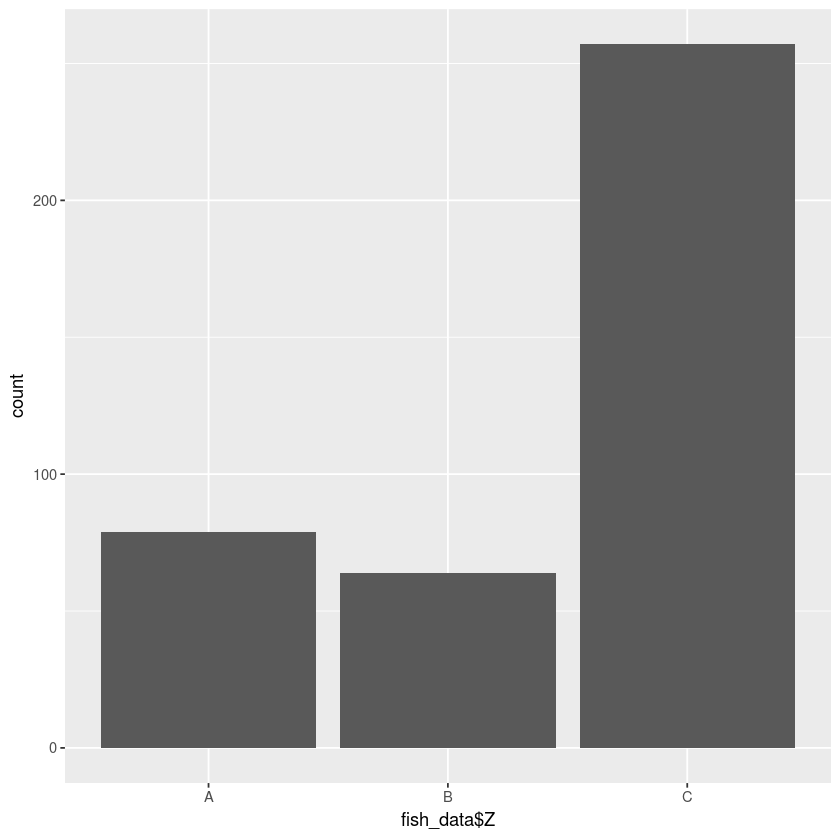

In [175]:
ggplot(data = fish_data) +
    geom_bar(mapping = aes(x = fish_data$Z))

In [238]:
by_bait <- group_by(fish_data, Z)



fish_data_by_bait <- summarise(by_bait, count_fish = n(), ave_mass = mean(Y, na.rm = TRUE), 
                               median_mass = median(Y, na.rm = TRUE))

fish_data_by_bait

Z,count_fish,ave_mass,median_mass
A,79,1.528987,1.34
B,64,1.783750,1.79
C,257,1.680973,1.66


In [228]:
# check if group_by and summarise worked correctly

sum(as.vector(fish_data[fish_data["Z"] == "C",]["Y"]))/ count(as.vector(fish_data[fish_data["Z"] == "C",]["Y"]))

n
1.680973


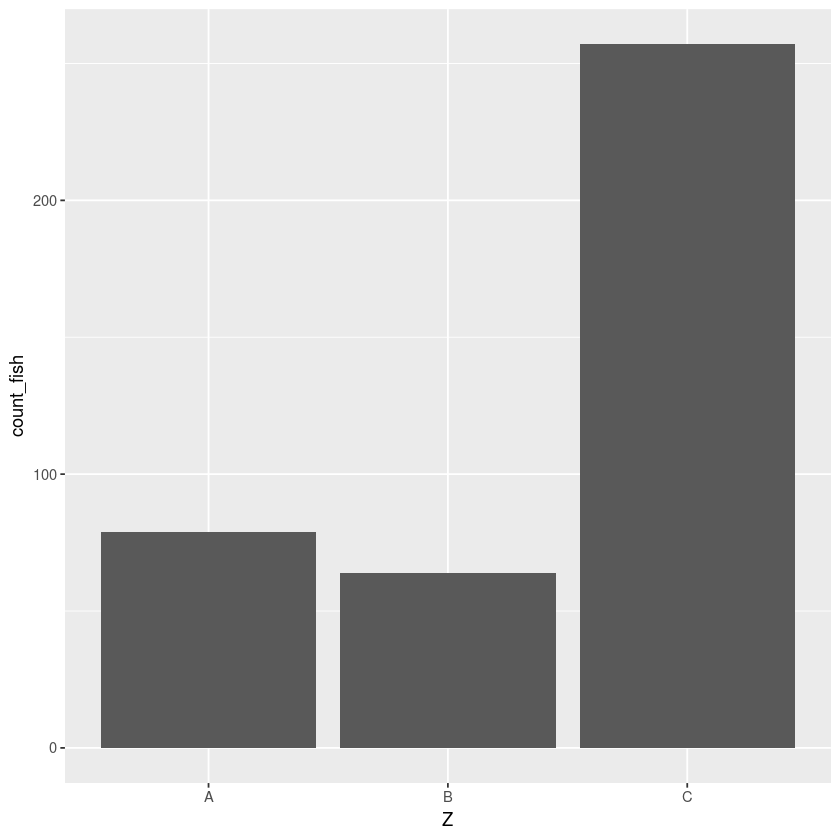

In [234]:
ggplot(data = fish_data_by_bait) +
    geom_bar(mapping = aes(x = Z, y = count_fish), stat = "identity")

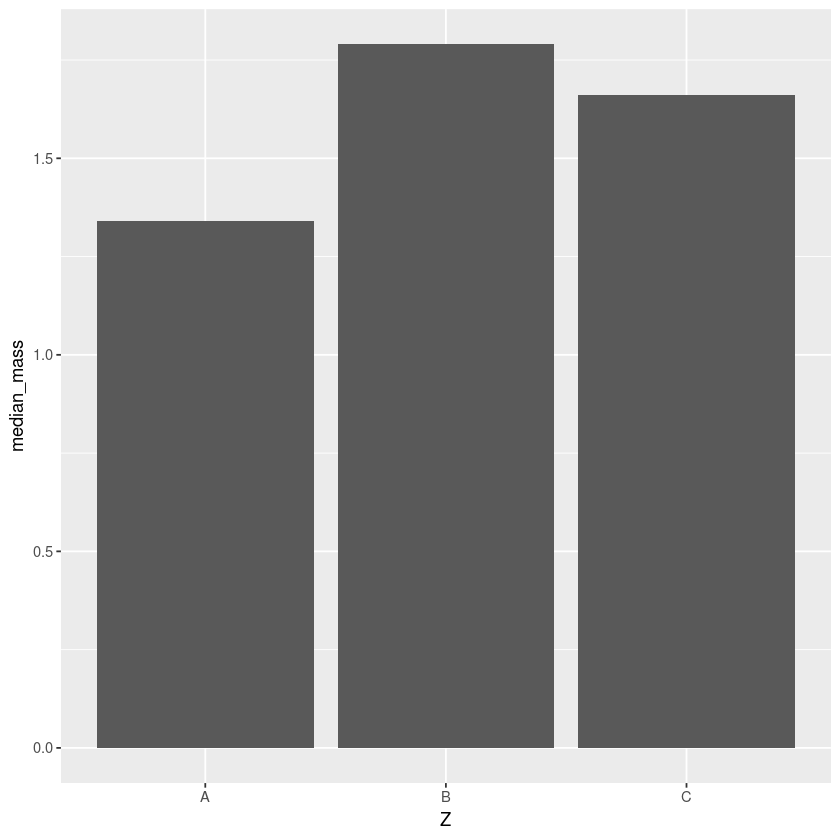

In [239]:
ggplot(data = fish_data_by_bait) +
    geom_bar(mapping = aes(x = Z, y = median_mass), stat = "identity")

**Even though bait type C caught many more fishes as a whole, bait type B generally caught heavier fishes**